### Análise de tweets dos políticos Jair Bolsonaro (Partido Liberal) e Lula da Silva (Partido dos trabalhadores)
###### Atividade realizada em março de 2023

Primeiro importar bibliotecas para visualizar as bases de dados:

In [2]:
import re
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings

import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
from nltk import FreqDist
from wordcloud import WordCloud
import string

stopwords = nltk.corpus.stopwords.words('portuguese')
%matplotlib inline
warnings.filterwarnings('ignore')


df_bolsonaro = pd.read_json('jairbolsonaro.json')
df_lula = pd.read_json('LulaOficial.json')


# Criarei uma lista com os dois DataFrames para usar loop for para realizar procedimentos identicos em ambos.
df = [df_bolsonaro, df_lula]
nome = ['bolsonaro', 'lula']

In [3]:
#nltk.download()

In [4]:
df_bolsonaro.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2010-04-01 02:59:50+00:00,11402700435,11402700435,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É...",False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,15,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_lula.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2018-08-17 16:23:04+00:00,1030490201460801541,1030490201460801536,"""O presidente Lula vai dar um passeio nessa el...",False,"[0, 212]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,347,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_bolsonaro.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,quoted_status_id,quoted_status_id_str
count,6.794000e+03,6.794000e+03,8.960000e+02,8.960000e+02,9.380000e+02,9.380000e+02,0.0,0.0,0.0,6794.000000,6794.00000,4840.000000,5.110000e+02,5.110000e+02
mean,9.392574e+17,9.392574e+17,1.126235e+18,1.126235e+18,1.160616e+17,1.160616e+17,NaN,NaN,NaN,2832.191934,17259.23403,0.000413,9.173497e+17,9.173497e+17
std,2.306608e+17,2.306608e+17,8.007480e+16,8.007480e+16,3.176804e+17,3.176804e+17,NaN,NaN,NaN,3825.469455,23296.47073,0.020326,1.544101e+17,1.544101e+17
min,1.139856e+10,1.139856e+10,1.805188e+10,1.805188e+10,6.741632e+06,6.741632e+06,NaN,NaN,NaN,0.000000,0.00000,0.000000,3.188040e+17,3.188040e+17
25%,7.949882e+17,7.949882e+17,1.091076e+18,1.091076e+18,1.283729e+08,1.283729e+08,NaN,NaN,NaN,197.000000,768.25000,0.000000,7.871808e+17,7.871808e+17
50%,1.015537e+18,1.015537e+18,1.132799e+18,1.132799e+18,1.283729e+08,1.283729e+08,NaN,NaN,NaN,1123.500000,5063.00000,0.000000,9.211851e+17,9.211851e+17
75%,1.115584e+18,1.115584e+18,1.185744e+18,1.185744e+18,1.283729e+08,1.283729e+08,NaN,NaN,NaN,4416.000000,28824.00000,0.000000,1.052834e+18,1.052834e+18
max,1.215030e+18,1.215030e+18,1.214932e+18,1.214932e+18,1.158390e+18,1.158390e+18,NaN,NaN,NaN,47448.000000,209562.00000,1.000000,1.213312e+18,1.213312e+18


In [7]:
df_lula.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,quoted_status_id,quoted_status_id_str
count,1.496100e+04,1.496100e+04,3.210000e+02,3.210000e+02,3.880000e+02,3.880000e+02,0.0,0.0,0.0,14961.000000,14961.000000,6052.000000,6.200000e+01,6.200000e+01
mean,9.006664e+17,9.006664e+17,9.467678e+17,9.467678e+17,2.224372e+09,2.224372e+09,NaN,NaN,NaN,282.220039,1040.279193,0.000330,1.060340e+18,1.060340e+18
std,1.670683e+17,1.670683e+17,1.343728e+17,1.343728e+17,9.738599e+08,9.738599e+08,NaN,NaN,NaN,1286.263890,5947.039040,0.018177,1.533471e+17,1.533471e+17
min,5.068213e+17,5.068213e+17,5.080068e+17,5.080068e+17,1.450223e+07,1.450223e+07,NaN,NaN,NaN,0.000000,0.000000,0.000000,7.500959e+17,7.500959e+17
25%,8.238888e+17,8.238888e+17,8.519482e+17,8.519482e+17,2.670727e+09,2.670727e+09,NaN,NaN,NaN,33.000000,63.000000,0.000000,9.437039e+17,9.437039e+17
50%,9.203011e+17,9.203011e+17,1.009560e+18,1.009560e+18,2.670727e+09,2.670727e+09,NaN,NaN,NaN,81.000000,190.000000,0.000000,1.116504e+18,1.116504e+18
75%,1.025782e+18,1.025782e+18,1.029835e+18,1.029835e+18,2.670727e+09,2.670727e+09,NaN,NaN,NaN,210.000000,543.000000,0.000000,1.171330e+18,1.171330e+18
max,1.215012e+18,1.215012e+18,1.214544e+18,1.214544e+18,3.988096e+09,3.988096e+09,NaN,NaN,NaN,82353.000000,352535.000000,1.000000,1.214502e+18,1.214502e+18


In [8]:
df_bolsonaro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6794 entries, 0 to 6793
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 6794 non-null   datetime64[ns, UTC]
 1   id                         6794 non-null   int64              
 2   id_str                     6794 non-null   int64              
 3   full_text                  6794 non-null   object             
 4   truncated                  6794 non-null   bool               
 5   display_text_range         6794 non-null   object             
 6   entities                   6794 non-null   object             
 7   source                     6794 non-null   object             
 8   in_reply_to_status_id      896 non-null    float64            
 9   in_reply_to_status_id_str  896 non-null    float64            
 10  in_reply_to_user_id        938 non-null    float64            
 11  in_r

In [9]:
df_lula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14961 entries, 0 to 14960
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 14961 non-null  datetime64[ns, UTC]
 1   id                         14961 non-null  int64              
 2   id_str                     14961 non-null  int64              
 3   full_text                  14961 non-null  object             
 4   truncated                  14961 non-null  bool               
 5   display_text_range         14961 non-null  object             
 6   entities                   14961 non-null  object             
 7   source                     14961 non-null  object             
 8   in_reply_to_status_id      321 non-null    float64            
 9   in_reply_to_status_id_str  321 non-null    float64            
 10  in_reply_to_user_id        388 non-null    float64            
 11  in

___

#### Primeiras percepções:

In [10]:
data_inicio_b = datetime.strptime(str(df_bolsonaro['created_at'].min()), '%Y-%m-%d %H:%M:%S%z').strftime('%d/%m/%Y')
data_fim_b = datetime.strptime(str(df_bolsonaro['created_at'].max()), '%Y-%m-%d %H:%M:%S%z').strftime('%d/%m/%Y')

data_inicio_l = datetime.strptime(str(df_lula['created_at'].min()), '%Y-%m-%d %H:%M:%S%z').strftime('%d/%m/%Y')
data_fim_l = datetime.strptime(str(df_lula['created_at'].max()), '%Y-%m-%d %H:%M:%S%z').strftime('%d/%m/%Y')


print(f'Jair Bolsonaro:\nTweets coletados entre {data_inicio_b} e {data_fim_b}.\n\
Total de {len(df_bolsonaro)} tweets.\n')

print(f'Lula da Silva:\nTweets coletados entre {data_inicio_l} e {data_fim_l}.\n\
Total de {len(df_lula)} tweets.\n')


Jair Bolsonaro:
Tweets coletados entre 01/04/2010 e 08/01/2020.
Total de 6794 tweets.

Lula da Silva:
Tweets coletados entre 02/09/2014 e 08/01/2020.
Total de 14961 tweets.



___

##### Verifiquei que as colunas abaixo contém a mesma informação em todas as linhas.

In [11]:
print(df_bolsonaro['truncated'].value_counts())
print(df_bolsonaro['favorited'].value_counts())
print(df_bolsonaro['retweeted'].value_counts())

print(df_lula['truncated'].value_counts())
print(df_lula['favorited'].value_counts())
print(df_lula['retweeted'].value_counts())

False    6794
Name: truncated, dtype: int64
False    6794
Name: favorited, dtype: int64
False    6794
Name: retweeted, dtype: int64
False    14961
Name: truncated, dtype: int64
False    14961
Name: favorited, dtype: int64
False    14961
Name: retweeted, dtype: int64


___

#### Visto que, para uma análise política sob a perspectiva dos dados que possuímos, muitas colunas não são muito relevantes, fiz uma seleção do que para mim possa ser mais importante para explorar. 

In [12]:
df_txt_bolsonaro = df[0][['created_at', 'full_text', 'display_text_range', 'favorite_count', 'retweet_count']]
df_txt_lula = df[1][['created_at', 'full_text', 'display_text_range', 'favorite_count', 'retweet_count']]

In [13]:
df_txt_lula.head(2)

,created_at,full_text,display_text_range,favorite_count,retweet_count
0,2018-08-17 16:23:04+00:00,"""O presidente Lula vai dar um passeio nessa el...","[0, 212]",347,79
1,2014-09-16 01:53:02+00:00,@dilmabr afirma que aqueles que querem acabar ...,"[0, 139]",9,17


In [14]:
df_txt_bolsonaro.head(2)

,created_at,full_text,display_text_range,favorite_count,retweet_count
0,2010-04-01 02:59:50+00:00,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É...","[0, 137]",15,30
1,2019-01-10 11:02:23+00:00,"Bom dia! 🇧🇷 #tbt com o amigo ""Canguru"", que já...","[0, 90]",31618,1773


___

#### É importante formatar a data de uma forma mais visível e melhor de se trabalhar:

In [15]:
df_txt_bolsonaro['created_at'] = df_txt_bolsonaro['created_at'].dt.strftime('%d/%m/%Y')
df_txt_bolsonaro['created_at'] = pd.to_datetime(df_txt_bolsonaro['created_at'])

df_txt_lula['created_at'] = df_txt_lula['created_at'].dt.strftime('%d/%m/%Y')
df_txt_lula['created_at'] = pd.to_datetime(df_txt_lula['created_at'])

In [16]:
# Organizando os dataframes por data:
df_txt_lula = df_txt_lula.sort_values('created_at')
df_txt_bolsonaro = df_txt_bolsonaro.sort_values('created_at')

In [17]:
df_txt_lula.head(2)

,created_at,full_text,display_text_range,favorite_count,retweet_count
3013,2014-01-10,.@padilhando cumprimenta motorista e passageir...,"[0, 106]",2,1
11532,2014-01-10,"""Assim como deu vitória a @Haddad_Fernando e ...","[0, 131]",5,2


In [18]:
df_txt_bolsonaro.head(2)

,created_at,full_text,display_text_range,favorite_count,retweet_count
0,2010-01-04,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É...","[0, 137]",15,30
3659,2010-01-04,Boa noite a todos @depchicolanecar @reportercrime,"[0, 49]",19,18


Acredito que para uma análise imparcial, é importante trabalhar com a mesma delimitação temporal.
Se os tweets de Lula de nossa base de dados se iniciam dia 10/01/2014, filtrarei os de Bolsonaro também a partir desta data.

In [19]:
df_txt_bolsonaro = df_txt_bolsonaro.loc[(df_txt_bolsonaro['created_at'] >=  '2014-01-10')
                                        &
                                        (df_txt_bolsonaro['created_at'] <=  '2019-12-31')]


df_txt_lula = df_txt_lula.loc[(df_txt_lula['created_at'] >=  '2014-01-10')
                                        &
                                        (df_txt_lula['created_at'] <=  '2019-12-31')]

Com as as duas variáveis submetidas à condições similares, podemos começar a fazer algumas investigações:

In [20]:
# Vou criar uma nova coluna indicado apenas o ano do tweet.

df_txt_bolsonaro['ano'] = pd.to_datetime(df_txt_bolsonaro['created_at']).dt.year
df_txt_lula['ano'] = pd.to_datetime(df_txt_lula['created_at']).dt.year

In [21]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Histogram(x=df_txt_bolsonaro['ano'], name='Bolsonaro'))
fig.add_trace(go.Histogram(x=df_txt_lula['ano'], name='Lula'))

fig.show()


In [22]:
fig = make_subplots(rows=2, cols=1, subplot_titles=('Bolsonaro', 'Lula'))

fig.add_trace(go.Violin(y=df_txt_bolsonaro['favorite_count'],name='Favorite Count', points='all', line_color='blue'))
fig.add_trace(go.Violin(y=df_txt_bolsonaro['retweet_count'], name='Retweet Count', points='all', line_color='red'))

fig.add_trace(go.Violin(y=df_txt_lula['favorite_count'],
                        name='Favorite Count', points='all', line_color='blue', showlegend=False), row=2, col=1)
fig.add_trace(go.Violin(y=df_txt_lula['retweet_count'], 
                        name='Retweet Count', points='all', line_color='red', showlegend=False), row=2, col=1)

fig.update_yaxes(title_text='Quantidade')
fig.update_layout(xaxis_title='')
fig.update_yaxes(range=[0, 360000])


fig.show()

A figura acima demonstra que mesmo que Lula faça mais publicações no twitter, bolsonaro tem um engajamento muito maior.

___

#### Datas relevantes:
Processo de impeachment de Dilma Rousseff:
> 2 de dezembro de 2015 – 31 de ago. de 2016

Período em que Lula esteve preso:
> 7 de abril de 2018 - 8 de novembro de 2019

Período de campanha eleitoral em que Bolsonaro foi eleito (2018):
> 31 de agosto de 2018 - 28 de outubro de 2018

Eleições do 1º turno de 2018:
> 7 de outubro de 2018

Eleições do 2º turno de 2018:
> 28 de outubro de 2018


###### Datas verificadas em:
###### https://pt.wikipedia.org/wiki/Prisão_de_Luiz_Inácio_Lula_da_Silva
###### https://www.tse.jus.br/comunicacao/noticias/2018/Janeiro/eleicoes-2018-2013-confira-o-calendario-com-as-principais-datas

Reflexões:
- O que ocorreu em 2015 no Twitter de Lula? Nossa base de dados só contém 66 entradas. 
- Bolsonaro segue uma crescente ampliação de publicações no Twitter em todo o período, Lula só tem uma crescente entre 2016 e 2017, onde saltou de 2000 tweets para 5000 tweets.
- Em 2017 havia fortes campanha a favor e contra a prisão de Lula.
- Em 2018 Lula estava preso e participou por algum tempo do processo eleitoral, até sua candidatura ser impugnada.
- Em 2019 se inicia a gestão do Governo Bolsonaro. Lula segue preso.

Verifiquei manualmente e realmente só há 66 tweets no perfil de Lula em 2015. Todos publicados no mesmo dia.

___

#### Vamos criar 3 DataFrames para trabalharmos estas 3 delimitações históricas.
#### Vou processar removendo pontuação, tokenizar e remover stopwords

In [23]:
dt_impeachment_bolsonaro = df_txt_bolsonaro.loc[(df_txt_bolsonaro['created_at'] >=  '2015-12-02')
                                        &
                                        (df_txt_bolsonaro['created_at'] <=  '2016-08-31')]

dt_prisao_bolsonaro = df_txt_bolsonaro.loc[(df_txt_bolsonaro['created_at'] >=  '2018-04-07')
                                        &
                                        (df_txt_bolsonaro['created_at'] <=  '2019-11-08')]

dt_eleicoes_bolsonaro = df_txt_bolsonaro.loc[(df_txt_bolsonaro['created_at'] >=  '2018-08-31')
                                        &
                                        (df_txt_bolsonaro['created_at'] <=  '2018-10-28')]


dt_impeachment_lula = df_txt_lula.loc[(df_txt_lula['created_at'] >=  '2015-12-02')
                                        &
                                        (df_txt_lula['created_at'] <=  '2016-08-31')]

dt_prisao_lula = df_txt_lula.loc[(df_txt_lula['created_at'] >=  '2018-04-07')
                                        &
                                        (df_txt_lula['created_at'] <=  '2019-11-08')]

dt_eleicoes_lula = df_txt_lula.loc[(df_txt_lula['created_at'] >=  '2018-08-31')
                                        &
                                        (df_txt_lula['created_at'] <=  '2018-10-28')]

In [24]:
print(f'Quantidade de tweets de Bolsonaro durante o processo de impeachment de Dilma: {dt_impeachment_bolsonaro.shape[0]}')
print(f'Quantidade de tweets de Lula durante o processo de impeachment de Dilma: {dt_impeachment_lula.shape[0]}\n')
print(f'Quantidade de tweets de Bolsonaro durante a prisão de Lula: {dt_prisao_bolsonaro.shape[0]}')
print(f'Quantidade de tweets de Lula durante a prisão de Lula: {dt_prisao_lula.shape[0]}\n')
print(f'Quantidade de tweets de Bolsonaro durante as eleições de 2018: {dt_eleicoes_bolsonaro.shape[0]}')
print(f'Quantidade de tweets de Lula durante as eleições de 2018: {dt_eleicoes_lula.shape[0]}\n')

Quantidade de tweets de Bolsonaro durante o processo de impeachment de Dilma: 559
Quantidade de tweets de Lula durante o processo de impeachment de Dilma: 899

Quantidade de tweets de Bolsonaro durante a prisão de Lula: 3381
Quantidade de tweets de Lula durante a prisão de Lula: 4491

Quantidade de tweets de Bolsonaro durante as eleições de 2018: 452
Quantidade de tweets de Lula durante as eleições de 2018: 1112



In [25]:
def processar_texto(texto):
    # Tornar tudo minúsculo
    texto = texto.lower()
    
    # Remover palavras iniciadas em https
    texto = re.sub(r'\bhttp[s]?:\/\/\S+\b', '', texto)

    # Remover pontuação

    texto_sem_pontuacao = ''.join([palavra for palavra in texto if palavra not in string.punctuation])
    
    # Separar palavras
    palavras = tokenize.word_tokenize(texto_sem_pontuacao, language='portuguese')
    
    # Remover stopwords
    stopwords = nltk.corpus.stopwords.words('portuguese')
    palavras_sem_stop = [palavra for palavra in palavras if palavra not in stopwords and len(palavra)>1]
    
    return palavras_sem_stop


def frequencia(texto_processado, quantidade):
    freq = FreqDist(texto_processado)
    freq = freq.most_common(quantidade)
    return freq

In [26]:
dt_impeachment_bolsonaro['full_text'] = dt_impeachment_bolsonaro['full_text'].apply(processar_texto)

dt_prisao_bolsonaro['full_text'] = dt_prisao_bolsonaro['full_text'].apply(processar_texto)

dt_eleicoes_bolsonaro['full_text'] = dt_eleicoes_bolsonaro['full_text'].apply(processar_texto)


dt_impeachment_lula['full_text'] = dt_impeachment_lula['full_text'].apply(processar_texto)

dt_prisao_lula['full_text'] = dt_prisao_lula['full_text'].apply(processar_texto)

dt_eleicoes_lula['full_text'] = dt_eleicoes_lula['full_text'].apply(processar_texto)


___

#### Delimitação 1: Processo de impeachment de Dilma Rousseff (2 de dezembro de 2015 – 31 de ago. de 2016)

In [27]:
impeachment_bolsonaro = ' '.join(dt_impeachment_bolsonaro['full_text'].apply(' '.join))
impeachment_lula =  ' '.join(dt_impeachment_lula['full_text'].apply(' '.join))

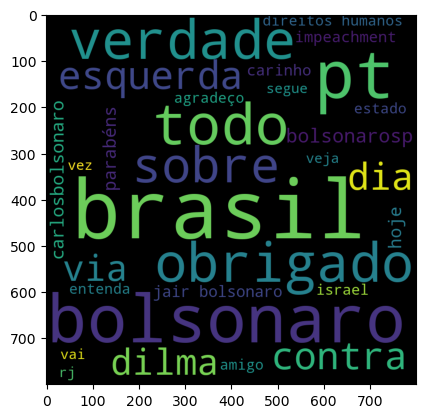

In [28]:
nuvem_de_palavras = WordCloud(stopwords=stopwords,
                              height=800,
                              width=800,
                              max_words=30)
nuvem_de_palavras.generate(impeachment_bolsonaro)

plt.imshow(nuvem_de_palavras)
plt.show()

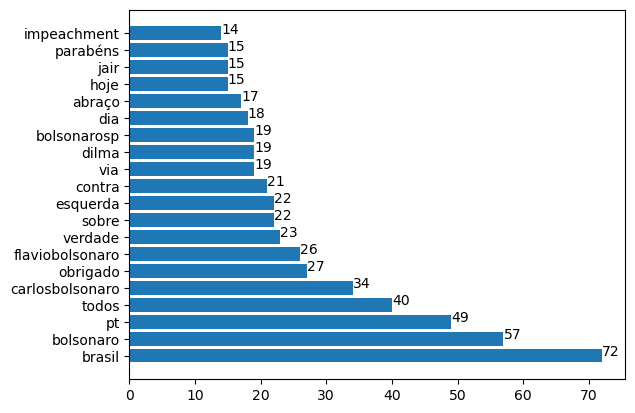

<Figure size 800x800 with 0 Axes>

In [29]:
top20 = frequencia(impeachment_bolsonaro.split(), 20)

top20 = dict(top20)
df = pd.DataFrame.from_dict(top20.items())
df = df.rename(columns={0:'Palavras', 1:'Repetições'})

# Adiciona os rótulos das barras
for i, v in enumerate(df['Repetições']):
    plt.text(v, i, str(v))

plt.barh(df['Palavras'], df['Repetições'])
plt.figure(figsize=(8, 8))
plt.show()

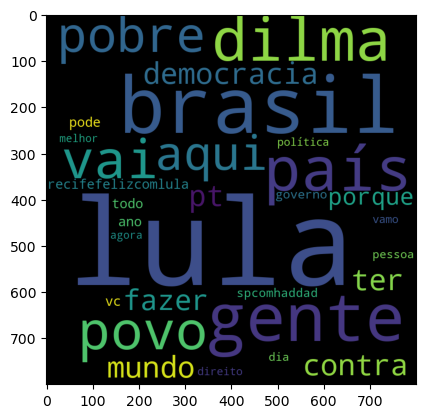

In [30]:
nuvem_de_palavras = WordCloud(stopwords=stopwords,
                              height=800,
                              width=800,
                              max_words=30)
nuvem_de_palavras.generate(impeachment_lula)

plt.imshow(nuvem_de_palavras)
plt.show()

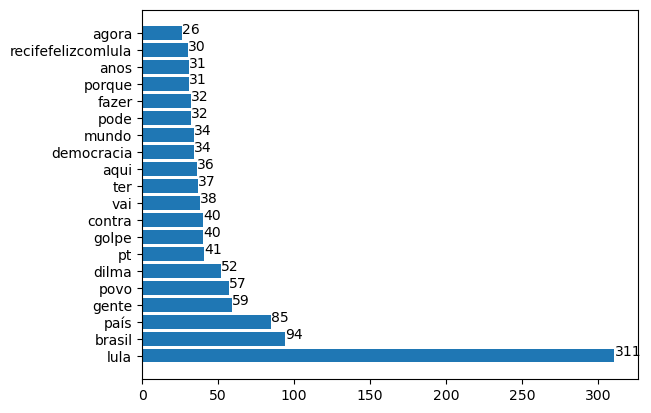

<Figure size 800x800 with 0 Axes>

In [31]:
top20 = frequencia(impeachment_lula.split(), 20)

top20 = dict(top20)
df = pd.DataFrame.from_dict(top20.items())
df = df.rename(columns={0:'Palavras', 1:'Repetições'})

for i, v in enumerate(df['Repetições']):
    plt.text(v, i, str(v))

plt.barh(df['Palavras'], df['Repetições'])
plt.figure(figsize=(8, 8))
plt.show()

Sob uma perspectiva de uma análise não enviesada, o ideal não seria trabalhar com valores absolutos.

Bolsonaro tem 559 tweets no período e Lula tem 899.

Mesmo que o ideal seja uma relação proporcional, é interessante perceber que Bolsonaro citou o termo PT 8 vezes mais que Lula. Podemos refletir sobre a construção e a efevercencia do antipetismo no período.


Nas 20 palavras mais frequentes:

> Bolsonaro cita 'PT': 49   |   Lula cita 'PT': 41


> Lula não se refere ao termo 'impeachment', mas aparecem citações à 'golpe'

> Bolsonaro não se refere ao termo 'golpe', mas aparecem citações à 'impeachment'

In [32]:
print(f'{(21/len(impeachment_bolsonaro.split())*100):.2f}% \
do total de palavras postadas por Bolsonaro no período citam a palavra "contra".')
print(f'{(40/len(impeachment_lula.split())*100):.2f}% \
do total de palavras postadas por Lula no período citam a palavra "contra".')

0.44% do total de palavras postadas por Bolsonaro no período citam a palavra "contra".
0.52% do total de palavras postadas por Lula no período citam a palavra "contra".


In [33]:
print(f'{(49/len(impeachment_bolsonaro.split())*100):.2f}% \
do total de palavras postadas por Bolsonaro no período citam o termo "PT".')
print(f'{(41/len(impeachment_lula.split())*100):.2f}% \
do total de palavras postadas por Lula no período citam o termo "PT".')

1.03% do total de palavras postadas por Bolsonaro no período citam o termo "PT".
0.53% do total de palavras postadas por Lula no período citam o termo "PT".


In [34]:
print(f'{(19/len(impeachment_bolsonaro.split())*100):.2f}% \
do total de palavras postadas por Bolsonaro no período citam o nome "Dilma".')

0.40% do total de palavras postadas por Bolsonaro no período citam o nome "DIlma".


___